# South Carolina social survey

### General notes


Provided details:

----------

Public Opinion About Nuclear Energy in the Context of Local Public Hearings About the Expansion of the V.C. Summer Nuclear Station, South Carolina, 2008-2009 (ICPSR 34871)

This study looked at public opinion surrounding nuclear energy in the lead up to a state-level decision about whether to accept the expansion of the Virgil C. Summer nuclear plant in Jenkinsville, SC. In the survey, respondents were asked about their feelings on nuclear power in South Carolina and the decision-makers who may be involved in the public hearing process


Data Collection Notes: The survey data includes a census weight variable, but no documentation was provided regarding how the weight was used or measured.

Sample: The sample was collected through landline phones based on a sample purchased by the survey center at the University of South Carolina.

Time Method: Longitudinal: Panel

Universe: Adult residents of Richland, Fairfield, Newberry, Lexington, and Kershaw counties in South Carolina.

----------------

## My own notes

Bias: Unknown

South Carolina is a southern state, therefore it's more likely to be against more progressive ideas. However, nuclear enery isn't a new idea. But it does go agaist the coal and natural gas industry, which does imploy many in this region of the US

Since the plant is to be *expanded*, that means that there is already plants around, and likely the residents are already used to the nuclear power plants

In [1]:
import pandas as pd
import os
import pyreadstat
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/ICPSR_34871/DS0001/")
os.listdir(os.getcwd())
df_IC, meta = pyreadstat.read_sav("34871-0001-Data.sav", user_missing=True, apply_value_formats=True)
df_IC

,RESPNUM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q2_W3,Q4_W3,Q6_W3,Q7_W3,Q8A_W3,Q13_W3,Q14_W3,Q17_W3,Q18_W3,DATE_W3
0,230.0,SOMEWHAT FAIR,SOMEWHAT FAIR,SOMEWHAT EFFECTIVE,SOMEWHAT FAIR,SOME RESPECT,SOMEWHAT TRUSTWORTHY,SOMEWHAT KNOWLEDGEABLE,VERY LEGITIMATE,VERY CONCERNED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,916.0,DO NOT KNOW,DO NOT KNOW,NOT AT ALL EFFECTIVE,VERY UNFAIR,NOT TOO MUCH RESPECT,NOT TOO TRUSTWORTHY,SOMEWHAT KNOWLEDGEABLE,NOT TOO LEGITIMATE,SOMEWHAT CONCERNED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,353.0,SOMEWHAT FAIR,VERY FAIR,NOT TOO EFFECTIVE,SOMEWHAT FAIR,SOME RESPECT,VERY TRUSTWORTHY,VERY KNOWLEDGEABLE,VERY LEGITIMATE,NOT AT ALL CONCERNED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,466.0,SOMEWHAT FAIR,VERY FAIR,NOT TOO EFFECTIVE,SOMEWHAT UNFAIR,NOT TOO MUCH RESPECT,NOT TOO TRUSTWORTHY,SOMEWHAT KNOWLEDGEABLE,SOMEWHAT LEGITIMATE,VERY CONCERNED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.0,SOMEWHAT FAIR,SOMEWHAT FAIR,VERY EFFECTIVE,VERY FAIR,SOME RESPECT,SOMEWHAT TRUSTWORTHY,VERY KNOWLEDGEABLE,SOMEWHAT LEGITIMATE,VERY CONCERNED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,909.0,VERY UNFAIR,SOMEWHAT FAIR,NOT TOO EFFECTIVE,VERY UNFAIR,NOT TOO MUCH RESPECT,NOT TOO TRUSTWORTHY,NOT TOO KNOWLEDGEABLE,NOT AT ALL LEGITIMATE,VERY CONCERNED,...,SOMEWHAT FAIR,VERY UNFAIR,NOT TOO TRUSTWORTHY,DO NOT KNOW,NOT TOO LEGITIMATE,SOMEWHAT FAVOR,SOMEWHAT IMPORTANT,NONE,ONE OR TWO,20090228.0
602,837.0,VERY UNFAIR,VERY FAIR,SOMEWHAT EFFECTIVE,SOMEWHAT UNFAIR,SOME RESPECT,SOMEWHAT TRUSTWORTHY,SOMEWHAT KNOWLEDGEABLE,SOMEWHAT LEGITIMATE,VERY CONCERNED,...,SOMEWHAT FAIR,SOMEWHAT UNFAIR,NOT TOO TRUSTWORTHY,SOMEWHAT DISSATISFIED,NOT TOO LEGITIMATE,SOMEWHAT OPPOSE,SOMEWHAT IMPORTANT,MORE THAN FIVE,ONE OR TWO,20090228.0
603,373.0,SOMEWHAT UNFAIR,SOMEWHAT UNFAIR,SOMEWHAT EFFECTIVE,SOMEWHAT FAIR,NO RESPECT AT ALL,NOT TOO TRUSTWORTHY,NOT TOO KNOWLEDGEABLE,SOMEWHAT LEGITIMATE,VERY CONCERNED,...,SOMEWHAT UNFAIR,SOMEWHAT UNFAIR,NOT AT ALL TRUSTWORTHY,SOMEWHAT DISSATISFIED,NOT TOO LEGITIMATE,STRONGLY OPPOSE,VERY IMPORTANT ISSUE,ONE OR TWO,ONE OR TWO,20090228.0
604,475.0,VERY UNFAIR,VERY UNFAIR,NOT AT ALL EFFECTIVE,VERY FAIR,NOT TOO MUCH RESPECT,NOT AT ALL TRUSTWORTHY,NOT TOO KNOWLEDGEABLE,NOT TOO LEGITIMATE,VERY CONCERNED,...,VERY UNFAIR,VERY UNFAIR,NOT TOO TRUSTWORTHY,VERY DISSATISFIED,NOT AT ALL LEGITIMATE,STRONGLY OPPOSE,VERY IMPORTANT ISSUE,THREE TO FIVE,ONE OR TWO,20090228.0


In [2]:
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
def mean_df_gen(col_name, df=df_IC):
    #Mean of groups
    temp_df = df[[col_name, "Q13"]].copy()
    temp_df['Q13'] = temp_df['Q13'].map({"STRONGLY OPPOSE": 1, "SOMEWHAT OPPOSE": 2, "SOMEWHAT FAVOR": 3, "STRONGLY FAVOR": 4})
    mean_df = temp_df.groupby([col_name])['Q13'].mean().reset_index().copy()
    return mean_df


In [3]:
df_names = pd.read_csv("output_file.csv",  encoding = 'unicode_escape', engine ='python')
for col in df_names.columns:
    if "nuclear" in col.lower():
        #print(col)
        pass

In [5]:
def drop_vals(df):
    df.drop(df[df.Q13.str.contains("DO NOT KNOW")].index, inplace=True)
    df.drop(df[df.Q13.str.contains("NO ANSWER")].index, inplace=True)

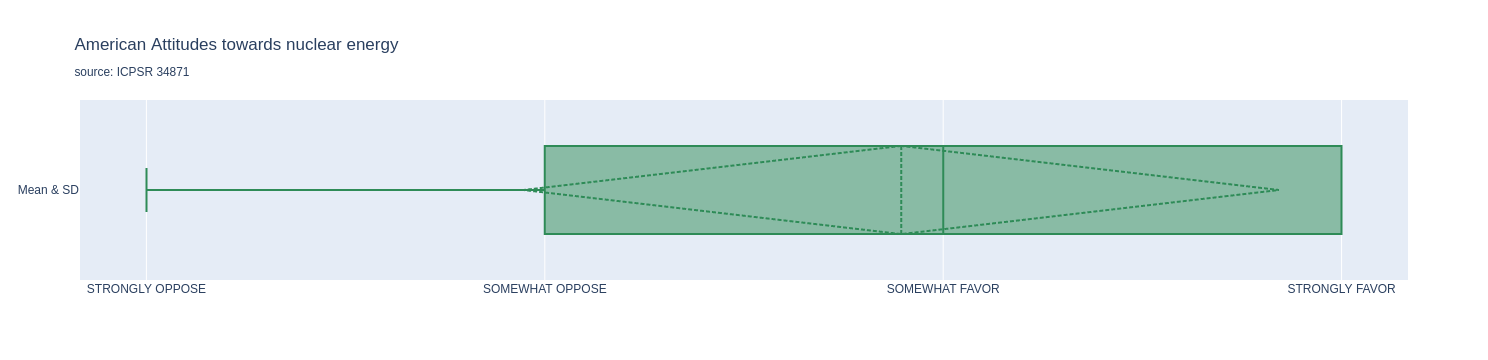

favor:  0.6994906621392191
oppose:  0.300509337860781


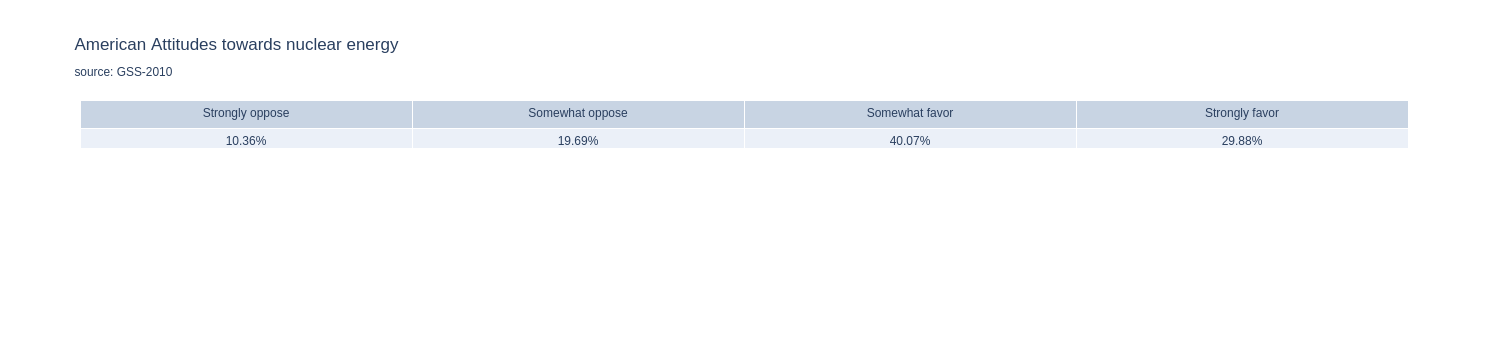

In [7]:
drop_vals(df_IC)
fig = go.Figure()
fig.add_trace(go.Box(
    x=df_IC["Q13"],
    name='Mean & SD',
    marker_color='seagreen',
    boxmean='sd' # represent mean and standard deviationfor x in 
)).update_xaxes(categoryorder='array', categoryarray=["STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"])
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: ICPSR 34871")
fig.show()

sers = df_IC['Q13'].value_counts()
fav = sers['SOMEWHAT FAVOR'] + sers['Strongly favor'.upper()]
opp = sers['SOMEWHAT OPPOSE'] + sers['Strongly oppose'.upper()]
total = fav + opp
print("favor: ", fav / (fav + opp))
print("oppose: ", opp / (fav + opp))
sers

fig = go.Figure(data=[go.Table(header=dict(values=['Strongly oppose', 'Somewhat oppose', 'Somewhat favor', 'Strongly favor']),
                 cells=dict(values=[[f"{(sers['Strongly oppose'.upper()]/total)*100:.2f}%"],
                                    [f"{(sers['SOMEWHAT oppose'.upper()]/total)*100:.2f}%"],
                                    [f"{(sers['SOMEWHAT favor'.upper()]/total)*100:.2f}%"],
                                    [f"{(sers['Strongly favor'.upper()]/total)*100:.2f}%"]]
                           ))
                     ])
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: GSS-2010")
fig.show()

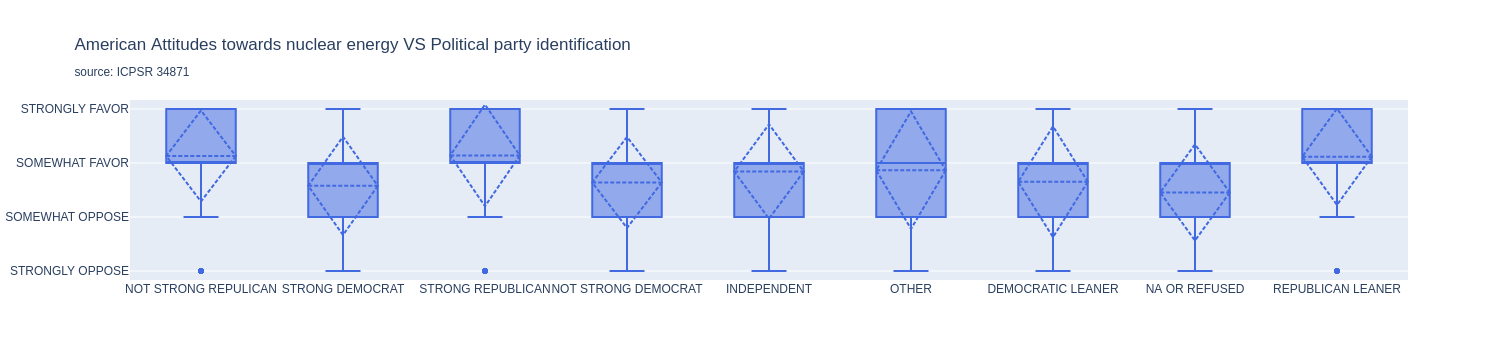

In [10]:
df_IC_temp = df_IC[df_IC.Q13 != 'DO NOT KNOW']
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC_temp["Q13"],
    x=df_IC_temp["D5"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviationfor x in 
)).update_yaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"])#.update_xaxes(
   # categoryorder='array', categoryarray=concern_list)
fig.update_layout(title_text="American Attitudes towards nuclear energy VS Political party identification<br><sub>source: ICPSR 34871")
fig.show()

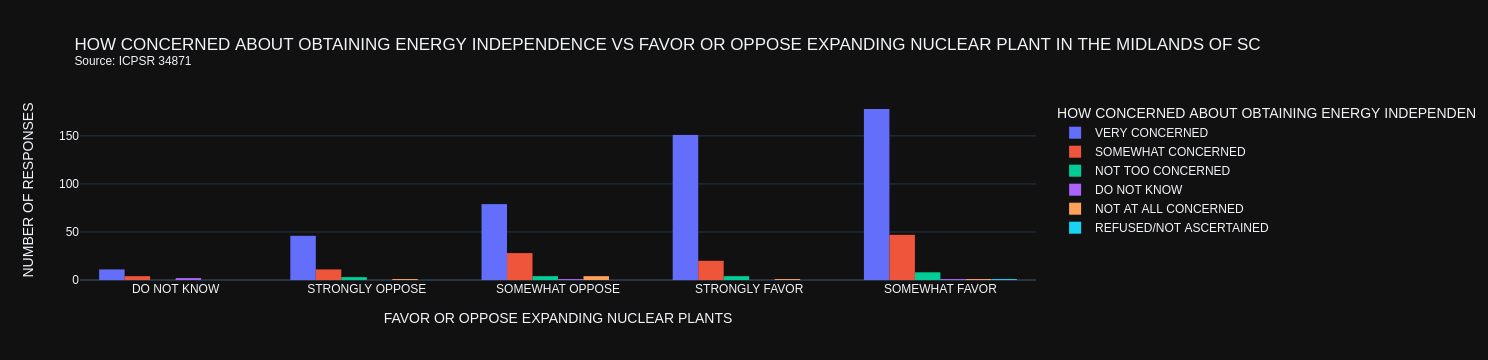

                       Q11       Q13
0              DO NOT KNOW  2.500000
1     NOT AT ALL CONCERNED  2.285714
2        NOT TOO CONCERNED  2.684211
3  REFUSED/NOT ASCERTAINED  3.000000
4       SOMEWHAT CONCERNED  2.716981
5           VERY CONCERNED  2.955947


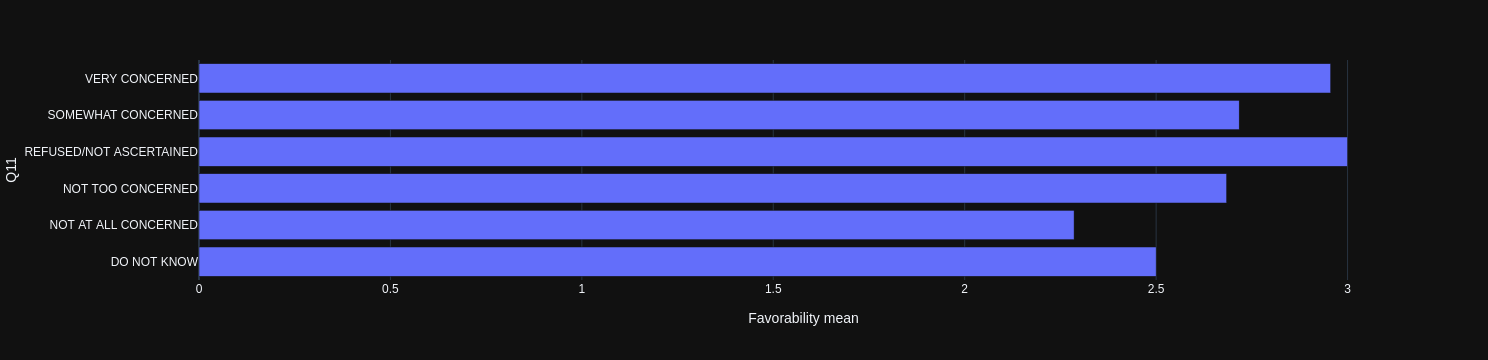

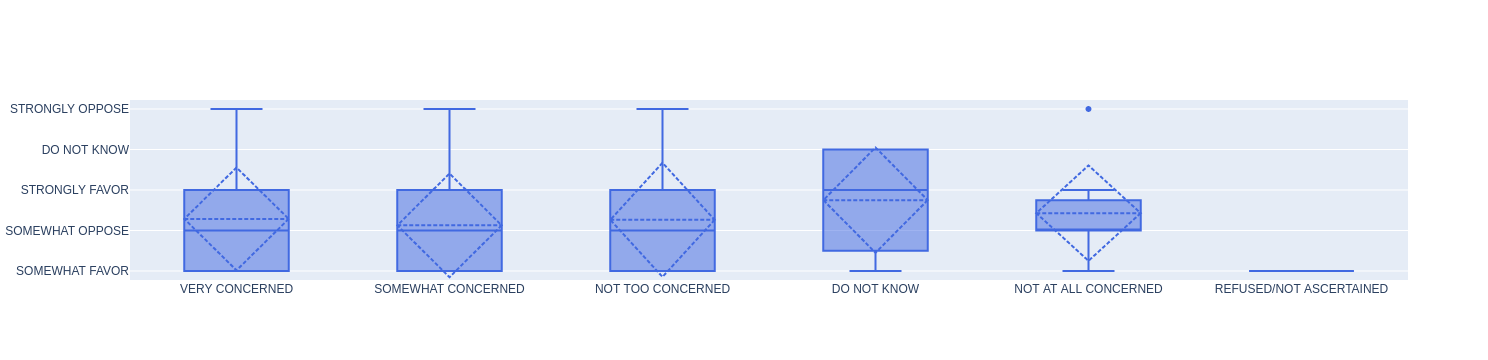

VERY CONCERNED             465
SOMEWHAT CONCERNED         110
NOT TOO CONCERNED           19
NOT AT ALL CONCERNED         7
DO NOT KNOW                  4
REFUSED/NOT ASCERTAINED      1
Name: Q11, dtype: int64

In [11]:

# Concern about Energy Indepenence vs Nuclear energy 

# Q11: HOW CONCERNED ABOUT OBTAINING ENERGY INDEPENDENCE
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

s = "HOW CONCERNED ABOUT OBTAINING ENERGY INDEPENDENCE" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="Q11", template='plotly_dark', title=title, barmode="group").update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="HOW CONCERNED ABOUT OBTAINING ENERGY INDEPENDENCE",
)
fig.show()

mean_df = mean_df_gen("Q11")
print(mean_df)
fig = px.bar(mean_df, x="Q13", y="Q11", barmode="group", template='plotly_dark').update_xaxes(
    categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="Favorability mean"
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["Q11"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviationfor x in 
))#.update_yaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_xaxes(
   # categoryorder='array', categoryarray=concern_list)
fig.show()

df_IC["Q11"].value_counts()

Generally, there is a much larger amount who are concerned with energy independence

And those who are concerned about energy independence are for nuclear energy

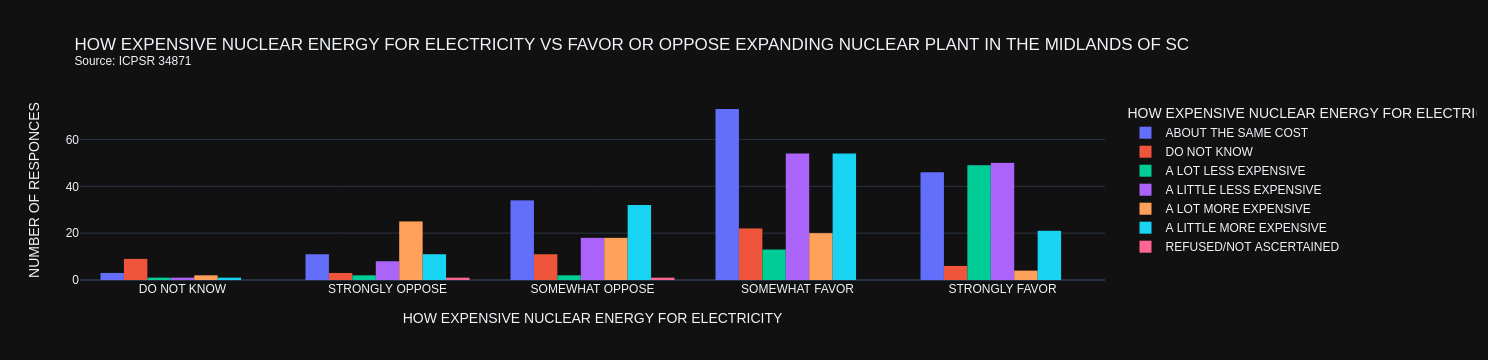

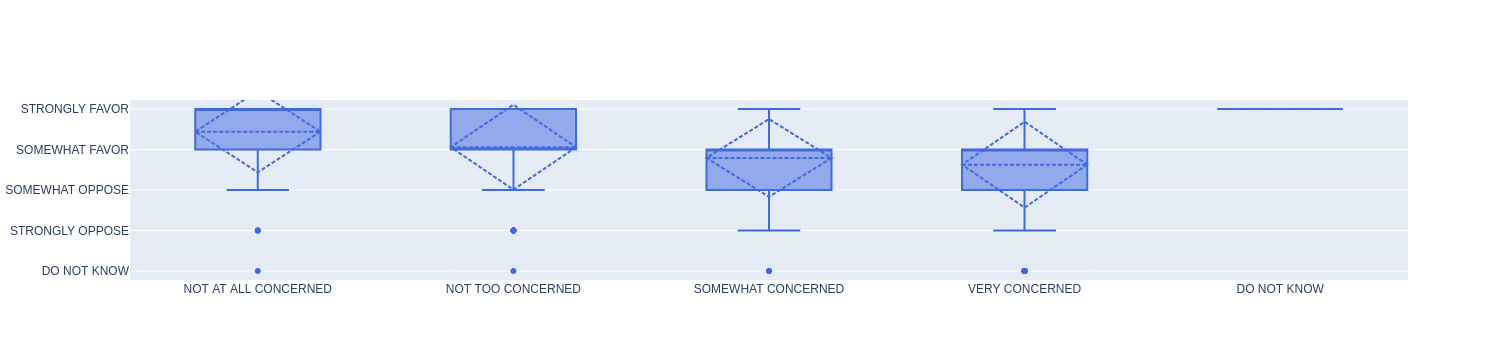

In [15]:
# Q12: HOW EXPENSIVE NUCLEAR ENERGY FOR ELECTRICITY
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

concern_list = ["Not at all concerned", "Not too concerned", "Somewhat concerned", "Very concerned"]
concern_list = [x.upper() for x in concern_list]

s = "HOW EXPENSIVE NUCLEAR ENERGY FOR ELECTRICITY" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="Q12", template='plotly_dark', title=title, barmode="group").update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="HOW EXPENSIVE NUCLEAR ENERGY FOR ELECTRICITY", yaxis_title="NUMBER OF RESPONCES", legend_title="HOW EXPENSIVE NUCLEAR ENERGY FOR ELECTRICITY",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["Q10"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviationfor x in 
)).update_yaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_xaxes(
    categoryorder='array', categoryarray=concern_list)
fig.show()

Generally, people are only willing to pay the same amount for nuclear energy. Maybe a little bit more. 

No one is really willing to pay a lot more besides the strongly oppose group for some reason 

**IMPORTANT GRAPH BELOW**

In [ ]:
# Q10: HOW CONCERNED ABOUT CLIMATE CHANGE
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

s = "HOW CONCERNED ABOUT CLIMATE CHANGE" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="Q10", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="HOW CONCERNED ABOUT CLIMATE CHANGE",
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["Q10"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviationfor x in 
)).update_yaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_xaxes(
    categoryorder='array', categoryarray=concern_list)
fig.show()

#Get mean
mean_df = mean_df_gen("Q10")

fig = px.bar(mean_df, x="Q13", y="Q10", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS MEAN", yaxis_title="HOW CONCERNED ABOUT CLIMATE CHANGE",
)
fig.show()


In [ ]:
# D2: AGE OF RESPONDANT
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC
s = "AGE OF RESPONDANT" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="D2", template='plotly_dark', title=title, barmode="group",).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()

fig = px.violin(df_IC, x="Q13", y="D2", title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()

df_age_range = df_IC[["Q13", "D2"]].copy()

def age_range(x):
    try:
        int_x = int(x)
    except ValueError as e:
        print(f"{x} can't be cast to int: ", e)
        return "50+"
    
    if int_x < 34:
        return "<34"
    elif int_x > 34 and int_x < 50:
        return "35-50"
    else:
        return "50+"

df_age_range['D2'] = df_age_range['D2'].apply(age_range)

fig = px.histogram(df_age_range, x="Q13", color="D2", title=title, barmode="group",).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()

mean_df = mean_df_gen("D2", df_age_range)
fig = px.histogram(mean_df, x="Q13", color="D2", title=title, barmode="group",).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()


In [ ]:
# D4: EDUCATION
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

s = "LEVEL OF EDUCATION" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="D4", template='plotly_dark', barmode="group", title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="Level of EDUCATION",
)
fig.show()

fig = px.violin(df_IC, x="Q13", y="D4").update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_yaxes(
    categoryorder='array', categoryarray=["REFUSED", "DO NOT KNOW", "FIFTH GRADE", "SIXTH GRADE", "EIGHTH GRADE", "SEVENTH GRADE", "EIGHTH GRADE", "NINTH GRADE", "TENTH GRADE",
                                                    "ELEVENTH GRADE", "TWELFTH GRADE", "GED", "ONE YEAR-COLLEGE", "TWO YEARS-COLLEGE", "THREE YEARS-COLLEGE"] ).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()

#Mean of groups
temp_df = df_IC[["D4", "Q13"]].copy()
temp_df['Q13'] = temp_df['Q13'].map({"STRONGLY OPPOSE": 1, "SOMEWHAT OPPOSE": 2, "SOMEWHAT FAVOR": 3, "STRONGLY FAVOR": 4})
mean_df = temp_df.groupby(['D4'])['Q13'].mean().reset_index().copy()

fig = px.bar(mean_df, x="Q13", y="D4", template='plotly_dark', barmode="group", title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="MEAN RESPONSE FROM GROUP", legend_title="Level of EDUCATION",
)
fig.show()
'''
fig = go.Figure(data=[go.Table(
    header=dict(values=list(["EDUCATION OF RESPONDANT", "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SOUTH CAROLINA"]),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[mean_df.D4, mean_df.Q13],
               fill_color='lavender',
               align='left'))
])
fig.show()
'''
mean_df.columns =["EDUCATION OF RESPONDANT", "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SOUTH CAROLINA MEAN"]

#a = mean_df.sort_values(by ='Science', ascending = 0)
#fig = ff.create_table(a)
#fig.show()

fav_list = ["STRONGLY FAVOR", "SOMEWHAT FAVOR", "DO NOT KNOW", "SOMEWHAT OPPOSE", "STRONGLY OPPOSE"]
fav_list.reverse()

education_list = ["REFUSED", "DO NOT KNOW", "FIFTH GRADE", "SIXTH GRADE", "EIGHTH GRADE", "SEVENTH GRADE", "EIGHTH GRADE", "NINTH GRADE", "TENTH GRADE",
            "ELEVENTH GRADE", "TWELFTH GRADE", "GED", "ONE YEAR-COLLEGE", "TWO YEARS-COLLEGE", "THREE YEARS-COLLEGE"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["D4"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)\
#fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.update_layout(height=500)
fig.show()

df_IC["Q13"].value_counts()

In [ ]:
# D6: RACE
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

# Mean level of support
s =  "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC" " VS "  + "RACE OF RESPONDANT"
title = s + "<br><sup>Source: ICPSR 34871<sup>"

# Convert my list of "somehwat favor", etc... to a scale of 1 to 4 and take the sum of all the numbers per race and divide by the amount of responses per race
# That mean (avg) can then be plotted on a histogram, or other graph type from 1 to 4

# Another thing you can do is just get the percentage. Look at Bisconti code for examples, but don't plot as pie chart. Plot as something else 

df_IC_Q13_numeric = df_IC[["D6", "Q13"]].copy()
df_IC_Q13_numeric['Q13'] = df_IC_Q13_numeric['Q13'].map({"STRONGLY OPPOSE": 1, "SOMEWHAT OPPOSE": 2, "SOMEWHAT FAVOR": 3, "STRONGLY FAVOR": 4})

# Groups by Race, then takes the average of Q13
print(df_IC_Q13_numeric.groupby(['D6'])['Q13'].mean().reset_index())
mean_df = df_IC_Q13_numeric.groupby(['D6'])['Q13'].mean().reset_index().copy()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(["RACE OF RESPONDANT", "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SOUTH CAROLINA"]),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[mean_df.D6, mean_df.Q13],
               fill_color='lavender',
               align='left'))
])
fig.show()

fig = px.bar(df_IC_Q13_numeric.groupby(['D6'])['Q13'].mean().reset_index(), x="D6", y="Q13", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="MEAN OF RESPONCES", legend_title="RACE",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["D6"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.show()

In [ ]:
df_IC_Q13_numeric = df_IC[["D6", "Q13"]].copy()
df_IC_Q13_numeric

In [ ]:
# D6: RACE
# Q13: FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC

s = "RACE OF RESPONDANT" + " VS " + "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC"
title = s + "<br><sup>Source: ICPSR 34871<sup>"
fig = px.histogram(df_IC, x="Q13", color="D6", template='plotly_dark', barmode="group", title=title).update_xaxes(categoryorder='array', categoryarray=["DO NOT KNOW", "STRONGLY OPPOSE", "SOMEWHAT OPPOSE", "SOMEWHAT FAVOR", "STRONGLY FAVOR"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="RACE",
)
fig.show()


In [ ]:
import numpy as np
#df_IC.groupby('D6')


df_IC_sm = df_IC[['D6', 'Q13']].copy()
df_IC_sm

#prints out a key which is the group and a list of indexes
#print(df_IC_sm.groupby('D6').groups)

grp1 = df_IC_sm.groupby('D6')
#print(grp1.groups)
#grp1.aggregate(np.sum)


#group_dict = {"STRONGLY FAVOR" : 0, "SOMEWHAT FAVOR" : 0, "SOMEWHAT OPPOSE" : 0, "STRONGLY OPPOSE" : 0}

grp = df_IC_sm.groupby('D6')
for name, group in grp:
    print(name)
    #print(group.index.size)
    #print(group.groupby('Q13').groups)
    group2 = group.groupby('Q13').groups


    
df_IC_sm.groupby('D6').size()
#for i in df_IC.groupby('D6').groups:
#    print(i)
    
#gk = df_IC.groupby('D6')
#gk.first()

In [ ]:
leaning_list = ["VERY LIBERAL", "SOMEWHAT LIBERAL", "MODERATE, LEANS LIBERAL", "MODERATE, LEANS TOWARD NEITHER SIDE", "SOMEWHAT LIBERAL", "MODERATE, LEANS TOWARD CONSERVATIVE", "SOMEWHAT CONSERVATIVE", "VERY CONSERVATIVE"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["D5A_W2"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array',
        categoryarray=leaning_list) 
fig.update_layout(height = 500, xaxis_title="Media source", yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT<br> IN THE MIDLANDS OF SOUTH CAROLINA")
fig.show()

In [ ]:
respect_list = ["NO RESPECT AT ALL", "NOT TOO MUCH RESPECT", "SOME RESPECT", "A GREAT DEAL OF RESPECT"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["Q5"],
    name='Mean & SD',
    marker_color='forestgreen',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=respect_list)
fig.update_layout(height = 500, xaxis_title="RESPECT DECISION-MAKERS IN PUBLIC HEARING PROCESS", yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS<br> OF SOUTH CAROLINA")
fig.show()

In [ ]:
angry_list = ["NOT AT ALL ANGRY", "NOT TOO ANGRY", "SOMEWHAT ANGRY", "VERY ANGRY"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_IC["Q13"],
    x=df_IC["Q15"],
    name='Mean & SD<br> of number of responses',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=angry_list)
fig.update_layout(height = 500, xaxis_title="HOW ANGRY IF DISAGREE WITH FINAL DECISION ABOUT EXPANDING", yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS<br> OF SOUTH CAROLINA")
fig.show()

In [ ]:
angry_list = ["NOT AT ALL ANGRY", "NOT TOO ANGRY", "SOMEWHAT ANGRY", "VERY ANGRY"]
fig = go.Figure()
fig.add_trace(go.Box(
    #y=df_IC["Q13"],
    x=df_IC["Q13"],
    name='Mean & SD<br> of number of responses',
    marker_color='violet',
    boxmean='sd' # represent mean and standard deviation
)).update_xaxes(categoryorder='array', categoryarray=fav_list)#.update_xaxes(categoryorder='array', categoryarray=angry_list)
fig.update_layout(height = 500, xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANT IN THE MIDLANDS OF SC")
fig.show()